In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings filter
from warnings import simplefilter


# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, precision_score, accuracy_score, confusion_matrix, f1_score, recall_score
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
#from keras.models import Sequential
#from keras.layers.core import Dense
#from keras.layers.core import Activation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error


In [2]:
colnames = ['status_Account', 'duration', 'credit_history',
             'purpose', 'credit_amount', 'savings_account', 'employment_since',
             'installment_rate', 'personal_status_sex', 'debtors', 
             'residence_since', 'property', 'age', 'other_installment_plans',
             'housing', 'existing_credits', 'job', 'people_provide_maintenance',
             'telephone', 'foreign_worker', 'creditworthy']

df = pd.read_csv('kredit.dat', header=None, sep="\t", names=colnames)
print(df.shape)
df1=df.copy()
df2=df.copy()

(1000, 21)


Handling missing values

In [3]:
df1.replace('A191', 0, inplace=True)
df1.replace('A192', 1, inplace=True)
df1.replace('A201', 1, inplace=True)
df1.replace('A202', 0, inplace=True)
df1.creditworthy.replace([1,2], [1,0], inplace=True)
df1.replace("?", np.nan, inplace=True)
df1.isnull().sum()
#replace missing values with mode
df1 = df1.apply(lambda x: x.fillna(x.value_counts().index[0]))
#Recheck for missing values
df1.isnull().sum()
print("Unique values of categorical variables:")
for att in df1.select_dtypes(include=[object]):
    print(att,":", df1[att].unique())

Unique values of categorical variables:
status_Account : ['A14' 'A12' 'A13' 'A11']
credit_history : ['A32' 'A33' 'A34' 'A30' 'A31']
purpose : ['A43' 'A46' 'A40' 'A41' 'A42' 'A49' 'A410' 'A45' 'A48' 'A44']
savings_account : ['A63' 'A65' 'A61' 'A64' 'A62']
employment_since : ['A73' 'A74' 'A75' 'A72' 'A71']
personal_status_sex : ['A93' 'A94' 'A92' 'A91']
debtors : ['A101' 'A102' 'A103']
property : ['A123' 'A124' 'A121' 'A122']
other_installment_plans : ['A143' 'A141' 'A142']
housing : ['A152' 'A153' 'A151']
job : ['A173' 'A174' 'A172' 'A171']


Data Visualization

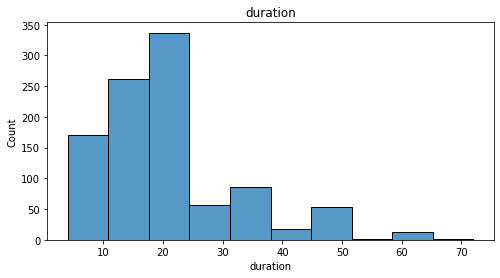

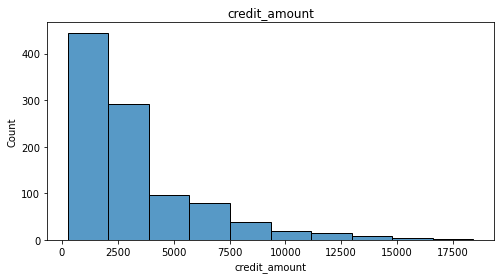

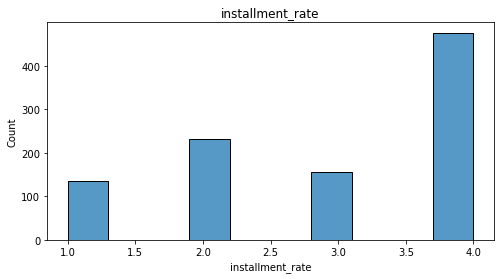

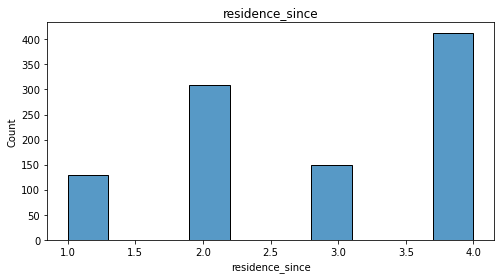

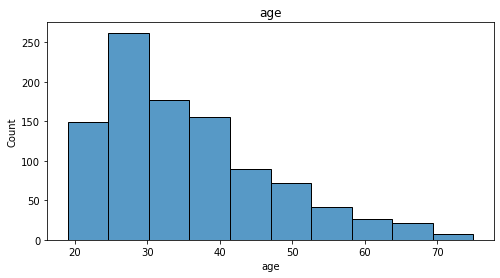

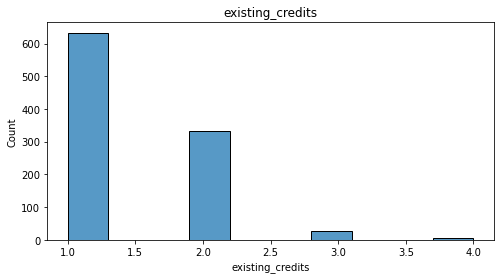

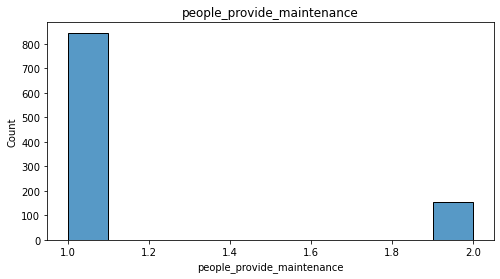

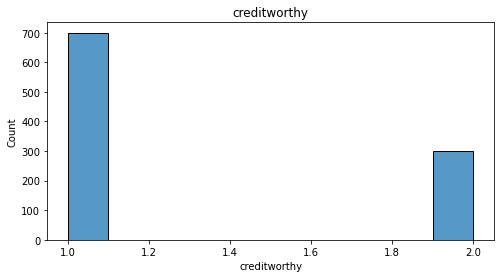

In [4]:
#Visualize the numerical variables
for att in df.select_dtypes(include=[np.number]):
    plt.figure(figsize=(8,4))
    sns.histplot(df[att], bins=10)
    plt.title(att)
    plt.show()


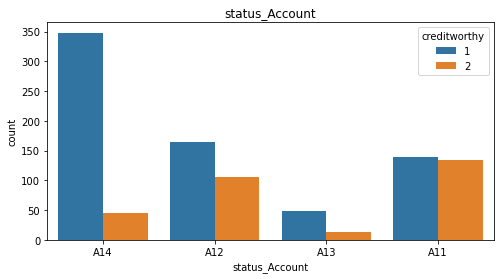

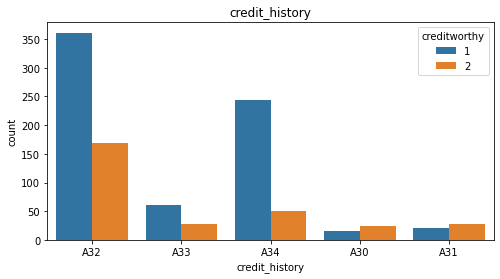

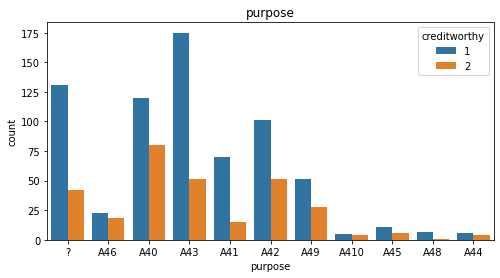

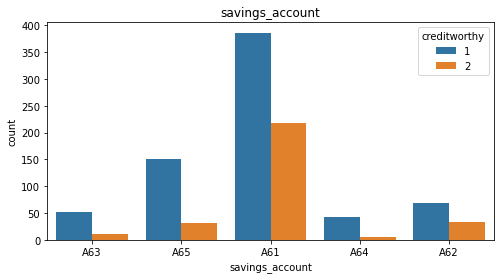

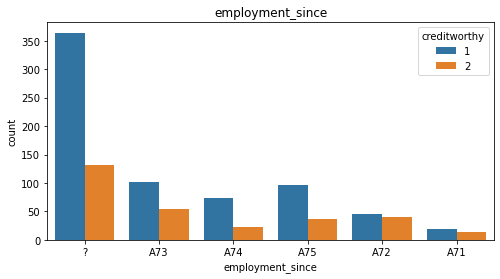

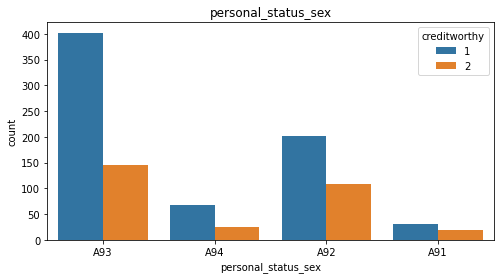

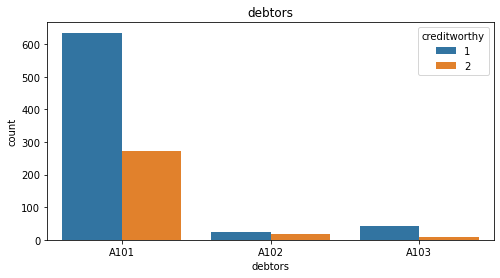

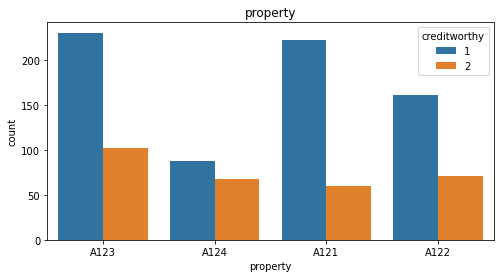

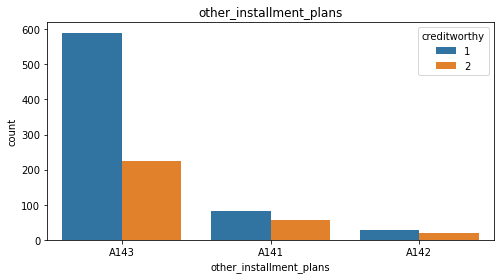

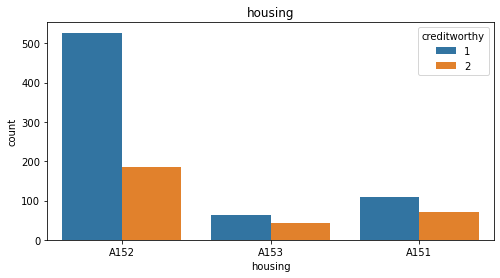

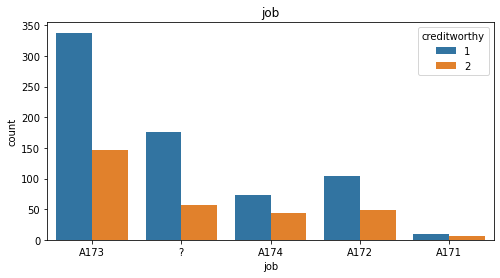

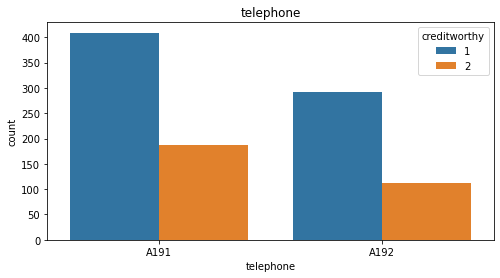

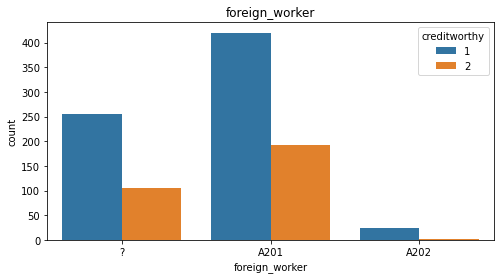

In [5]:
#Impact on creditworthy with respect to each value in categorical variables
for att in df.select_dtypes(include=[object]):
    plt.figure(figsize=(8,4))
    sns.countplot(x=att, hue=df.creditworthy, data=df)
    plt.title(att)
    plt.show()


In [6]:
#Value count of categorical variables
for att in df.select_dtypes(include=[object]):
    print(att,":", df[att].value_counts())


status_Account : A14    394
A11    274
A12    269
A13     63
Name: status_Account, dtype: int64
credit_history : A32    530
A34    293
A33     88
A31     49
A30     40
Name: credit_history, dtype: int64
purpose : A43     226
A40     200
?       173
A42     152
A41      85
A49      79
A46      41
A45      17
A44      10
A410      9
A48       8
Name: purpose, dtype: int64
savings_account : A61    603
A65    183
A62    103
A63     63
A64     48
Name: savings_account, dtype: int64
employment_since : ?      496
A73    157
A75    133
A74     96
A72     85
A71     33
Name: employment_since, dtype: int64
personal_status_sex : A93    548
A92    310
A94     92
A91     50
Name: personal_status_sex, dtype: int64
debtors : A101    907
A103     52
A102     41
Name: debtors, dtype: int64
property : A123    332
A121    282
A122    232
A124    154
Name: property, dtype: int64
other_installment_plans : A143    814
A141    139
A142     47
Name: other_installment_plans, dtype: int64
housing : A152    713


In [7]:
#Correlation between variables and creditworthy
correlations = df.corr()['creditworthy'].sort_values()
# Display correlations
print('Correlations:\n', correlations)


Correlations:
 age                          -0.091127
existing_credits             -0.045732
people_provide_maintenance   -0.003015
residence_since               0.002967
installment_rate              0.072404
credit_amount                 0.154739
duration                      0.214927
creditworthy                  1.000000
Name: creditworthy, dtype: float64


Variables elimination with respect to domain knowledge and variability and then seperating the Independent and Dependent variable.

In [8]:
#Value count of categorical variables
for att in df1.select_dtypes(include=[object, np.number]):
    print(att,":", df1[att].value_counts())

status_Account : A14    394
A11    274
A12    269
A13     63
Name: status_Account, dtype: int64
duration : 24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
22      2
54      2
16      2
72      1
26      1
5       1
47      1
40      1
Name: duration, dtype: int64
credit_history : A32    530
A34    293
A33     88
A31     49
A30     40
Name: credit_history, dtype: int64
purpose : A43     399
A40     200
A42     152
A41      85
A49      79
A46      41
A45      17
A44      10
A410      9
A48       8
Name: purpose, dtype: int64
credit_amount : 1275    3
1478    3
1258    3
1262    3
1393    3
       ..
1322    1
3577    1
2169    1
804     1
1223    1
Name: credit_amount, Length: 921, dtype: int64
savings_account : A61    603
A65    183
A62    103
A63     63
A64     48
Name: savings_account, 

In [9]:
df1.drop(['debtors', 'people_provide_maintenance', 'foreign_worker', 'telephone'], axis=1, inplace=True)

In [10]:
print(df1.head())
print(df1.shape)
#16 Dependent variables and 1 independent variable

  status_Account  duration credit_history purpose  credit_amount  \
0            A14        36            A32     A43           2299   
1            A12        18            A32     A46           1239   
2            A13        24            A32     A40            947   
3            A14        15            A33     A43           1478   
4            A14        24            A32     A40           1525   

  savings_account employment_since  installment_rate personal_status_sex  \
0             A63              A73                 4                 A93   
1             A65              A73                 4                 A93   
2             A61              A74                 4                 A93   
3             A61              A73                 4                 A94   
4             A64              A74                 4                 A92   

   residence_since property  age other_installment_plans housing  \
0                4     A123   39                    A143    A152  

In [11]:
#Seperating dependent and independent variables
X = df1.drop(['creditworthy'], axis=1)
X_2 = X.copy() # Used for second approach
y = df1['creditworthy']
y_2 = y.copy() # Used for second approach

Dealing with categorical variables  - Approach #1 : Label Encoding, Approach #2 : One Hot Encoding

Approach #1

In [12]:
#Label all object variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])
        print(col)

X.info()

status_Account
credit_history
purpose
savings_account
employment_since
personal_status_sex
property
other_installment_plans
housing
job
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status_Account           1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   credit_amount            1000 non-null   int64
 5   savings_account          1000 non-null   int64
 6   employment_since         1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   residence_since          1000 non-null   int64
 10  property                 1000 non-null   int64
 11  age                      1000 non-null   int64
 12  other_installment_plans  

In [13]:
#Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 16)
(200, 16)
(800,)
(200,)


Training and Testing on ML Models

['Random Forest Classifier', 0.735, 0.820881959239079, 0.7579089861751152, 0.8962962962962961]
True Negative: 27
False Positive: 38
False Negative: 18
True Positive: 117


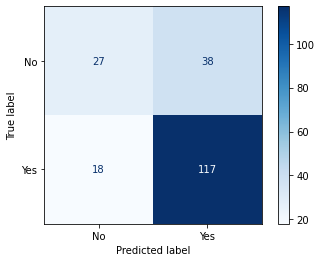

              precision    recall  f1-score   support

           0       0.60      0.42      0.49        65
           1       0.75      0.87      0.81       135

    accuracy                           0.72       200
   macro avg       0.68      0.64      0.65       200
weighted avg       0.70      0.72      0.70       200



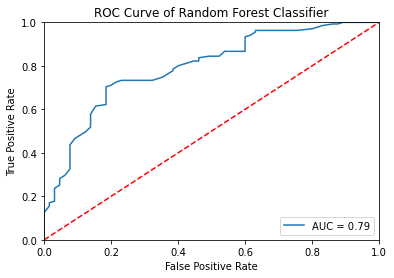

ROC AUC: 0.7943019943019942
Precision Score: 0.7548387096774194
Recall Score: 0.8666666666666667


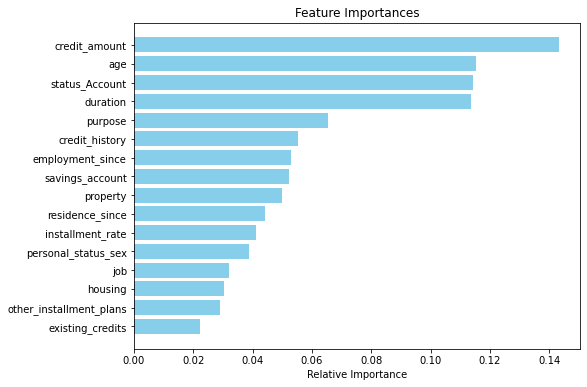

In [14]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
list1 = ['Random Forest Classifier', cross_val_score(rf, X_test, y_test, scoring="accuracy", cv = 5).mean(), cross_val_score(rf, X_test, y_test, scoring="f1", cv = 5).mean(), cross_val_score(rf, X_test, y_test, scoring="precision", cv = 5).mean(), cross_val_score(rf, X_test, y_test, scoring="recall", cv = 5).mean()]
print(list1)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')
#Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test, display_labels=['No', 'Yes'], cmap=plt.cm.Blues)
plt.show()
#Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
#create ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC = %0.2f" % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()
#Print ROC AUC score
print(f'ROC AUC: {auc}')
#Print Precision Score
print(f'Precision Score: {precision_score(y_test, y_pred)}')
#Print Recall Score
print(f'Recall Score: {recall_score(y_test, y_pred)}')
#Important features
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Relative Importance')
plt.show()


['Logistic Regression', 0.72, 0.7945176092032076, 0.7847739404747192, 0.8074074074074075]
True Negative: 26
False Positive: 39
False Negative: 14
True Positive: 121


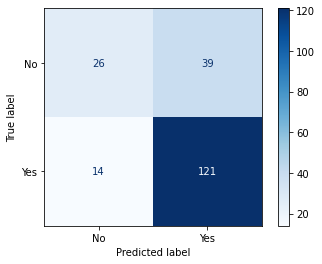

              precision    recall  f1-score   support

           0       0.65      0.40      0.50        65
           1       0.76      0.90      0.82       135

    accuracy                           0.73       200
   macro avg       0.70      0.65      0.66       200
weighted avg       0.72      0.73      0.71       200



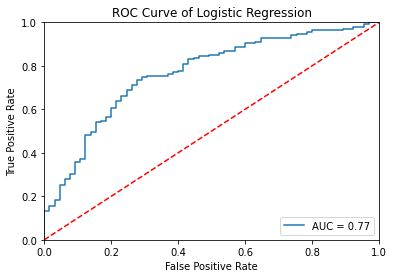

ROC AUC: 0.7654700854700854
Precision Score: 0.75625
Recall Score: 0.8962962962962963

The most important features are:
                   Variable     Coeff
0            status_Account   0.57178
1                  duration  -0.02686
2            credit_history   0.25853
3                   purpose    0.0442
4             credit_amount    -8e-05
5           savings_account   0.24361
6          employment_since   0.07759
7          installment_rate  -0.21125
8       personal_status_sex   0.15785
9           residence_since   -0.0449
10                 property  -0.22511
11                      age    0.0159
12  other_installment_plans    0.0755
13                  housing   0.03217
14         existing_credits  -0.06698
15                      job  -0.00748


In [15]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[::,1]
list2 = ["Logistic Regression", cross_val_score(lr, X_test, y_test, scoring="accuracy", cv = 5).mean(), cross_val_score(lr, X_test, y_test, scoring="f1", cv = 5).mean(), cross_val_score(lr, X_test, y_test, scoring="precision", cv = 5).mean(), cross_val_score(lr, X_test, y_test, scoring="recall", cv = 5).mean()]
print(list2)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')
#Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test, display_labels=['No', 'Yes'], cmap=plt.cm.Blues)
plt.show()
#Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
#create ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC = %0.2f" % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.legend(loc="lower right")
plt.show()
#Print ROC AUC score
print(f'ROC AUC: {auc}')
#Print Precision Score
print(f'Precision Score: {precision_score(y_test, y_pred)}')
#Print Recall Score
print(f'Recall Score: {recall_score(y_test, y_pred)}\n')
#Important features
print('The most important features are:')
importance = lr.coef_[0]
# summarize feature importance
fieldList = np.array(list(X)).reshape(-1,1)
coeffs = np.reshape(np.round(lr.coef_,5),(-1,1))
coeffs=np.concatenate((fieldList,coeffs),axis=1)
print(pd.DataFrame(coeffs,columns=['Variable','Coeff']))

['Decision Tree Classifier', 0.7200000000000001, 0.7955009307614958, 0.789660490706097, 0.8074074074074075]


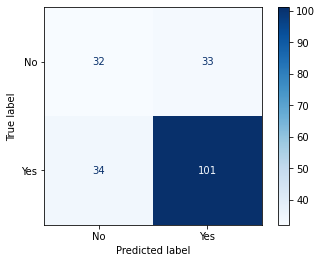

              precision    recall  f1-score   support

           0       0.48      0.49      0.49        65
           1       0.75      0.75      0.75       135

    accuracy                           0.67       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.67      0.67      0.67       200



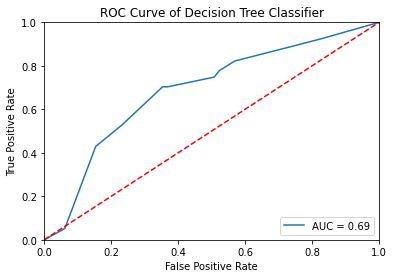

ROC AUC: 0.6877492877492877
Precision Score: 0.753731343283582
Recall Score: 0.7481481481481481

The most important features are:
status_Account 0.2955845741107313
duration 0.14483422106240268
age 0.11054604241104861
savings_account 0.09448254282001714
credit_amount 0.07461165981337115
purpose 0.05255144916700631
credit_history 0.050117642735754885
installment_rate 0.03935116270132306
employment_since 0.030234228112927447
other_installment_plans 0.027935529547152456


In [16]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, max_depth=6)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[::,1]
list3 = ["Decision Tree Classifier", cross_val_score(dt, X_test, y_test, scoring="accuracy", cv = 5).mean(), cross_val_score(dt, X_test, y_test, scoring="f1", cv = 5).mean(), cross_val_score(dt, X_test, y_test, scoring="precision", cv = 5).mean(), cross_val_score(dt, X_test, y_test, scoring="recall", cv = 5).mean()]
print(list3)
#Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test, display_labels=['No', 'Yes'], cmap=plt.cm.Blues)
plt.show()
#Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
#create ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC = %0.2f" % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()
#Print ROC AUC score
print(f'ROC AUC: {auc}')
#Print Precision Score
print(f'Precision Score: {precision_score(y_test, y_pred)}')
#Print Recall Score
print(f'Recall Score: {recall_score(y_test, y_pred)}\n')
#Important features
print('The most important features are:')
for importance, name in sorted(zip(dt.feature_importances_, X_train.columns),reverse=True)[:10]:
    print (name, importance)


In [17]:
#Tabulate the results
from tabulate import tabulate
list_metrics = ["Models","Accuracy", "F1 Score", "Precision", "Recall"]
list_values = [list1, list2, list3]
table = tabulate(list_values, headers=list_metrics, tablefmt="fancy_grid")
print(table)

╒══════════════════════════╤════════════╤════════════╤═════════════╤══════════╕
│ Models                   │   Accuracy │   F1 Score │   Precision │   Recall │
╞══════════════════════════╪════════════╪════════════╪═════════════╪══════════╡
│ Random Forest Classifier │      0.735 │   0.820882 │    0.757909 │ 0.896296 │
├──────────────────────────┼────────────┼────────────┼─────────────┼──────────┤
│ Logistic Regression      │      0.72  │   0.794518 │    0.784774 │ 0.807407 │
├──────────────────────────┼────────────┼────────────┼─────────────┼──────────┤
│ Decision Tree Classifier │      0.72  │   0.795501 │    0.78966  │ 0.807407 │
╘══════════════════════════╧════════════╧════════════╧═════════════╧══════════╛


Hyperparameter optimization for the above Models for Approach #1

In [18]:
#Hyperparameter tuning for Random Forest Classifier
from sklearn.model_selection import GridSearchCV
parameters = { "n_estimators": [20, 30, 50, 70, 100], "criterion": ["gini", "entropy"], "max_depth": [10, 20, 30, 40, 50], "random_state": [10, 20, 30, 40, 50]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50, 'random_state': 40}
0.8462084026775549


In [19]:
#Hyperparameter Tuning for logistic regression
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200, 300, 400, 500], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(lr, parameters, cv=5, scoring='f1', return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'C': 0.5, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.8398314058964292


In [20]:
#Hyperparameter Tuning for decision tree
from sklearn.model_selection import GridSearchCV
parameters = { "max_features": ["auto", "sqrt", "log2"], "min_samples_leaf": [3, 4, 5, 7, 10], "min_samples_split": [8, 10, 12, 15], "criterion": ["gini", "entropy"], "max_depth": [10, 20, 30, 40, 50], "random_state": [10, 20, 30, 40, 50]}
grid_search = GridSearchCV(dt, parameters, cv=5, scoring='f1', return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 8, 'random_state': 30}
0.8151098623823655


Apporach #2

In [21]:
X_2_onehot = pd.get_dummies(X_2)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_2_onehot, y_2, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 53)
(200, 53)
(800,)
(200,)


Training and Testing on ML Models

['Random Forest Classifier', 0.74, 0.8197580015612804, 0.7739724102807267, 0.874074074074074]
True Negative: 26
False Positive: 39
False Negative: 17
True Positive: 118


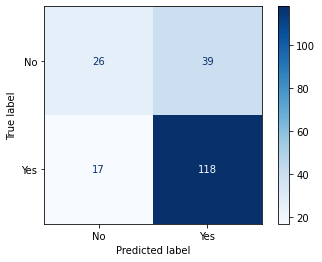

              precision    recall  f1-score   support

           0       0.60      0.40      0.48        65
           1       0.75      0.87      0.81       135

    accuracy                           0.72       200
   macro avg       0.68      0.64      0.64       200
weighted avg       0.70      0.72      0.70       200



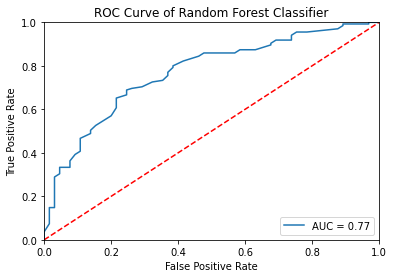

ROC AUC: 0.7691168091168091
Precision Score: 0.7515923566878981
Recall Score: 0.8740740740740741

The top 20 important features are:
credit_amount 0.11149893988474327
age 0.09362637549906198
duration 0.09109998866539204
status_Account_A14 0.051523867560048356
installment_rate 0.03755819114629562
residence_since 0.03631990227732208
status_Account_A11 0.033933765966671525
savings_account_A61 0.023532974198033914
status_Account_A12 0.022882773114668468
existing_credits 0.020000786205500103
credit_history_A34 0.018618952599300846
housing_A152 0.017816974759120686
purpose_A40 0.017797361888607432
personal_status_sex_A93 0.017373134975402695
personal_status_sex_A92 0.01700107195943606
purpose_A43 0.01691207426478934
property_A122 0.01688767762616359
property_A123 0.016050924109047942
property_A121 0.015985820421758824
property_A124 0.01592929904694615


In [23]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
list4 = ['Random Forest Classifier', cross_val_score(rf, X_test, y_test, scoring="accuracy", cv = 5).mean(), cross_val_score(rf, X_test, y_test, scoring="f1", cv = 5).mean(), cross_val_score(rf, X_test, y_test, scoring="precision", cv = 5).mean(), cross_val_score(rf, X_test, y_test, scoring="recall", cv = 5).mean()]
print(list4)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')
#Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test, display_labels=['No', 'Yes'], cmap=plt.cm.Blues)
plt.show()
#Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
#create ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC = %0.2f" % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()
#Print ROC AUC score
print(f'ROC AUC: {auc}')
#Print Precision Score
print(f'Precision Score: {precision_score(y_test, y_pred)}')
#Print Recall Score
print(f'Recall Score: {recall_score(y_test, y_pred)}\n')
#Important features
print('The top 20 important features are:')
for importance, name in sorted(zip(rf.feature_importances_, X_train.columns),reverse=True)[:20]:
    print (name, importance)

['Logistic Regression', 0.75, 0.8247530313542801, 0.7821296296296296, 0.874074074074074]
True Negative: 28
False Positive: 37
False Negative: 16
True Positive: 119


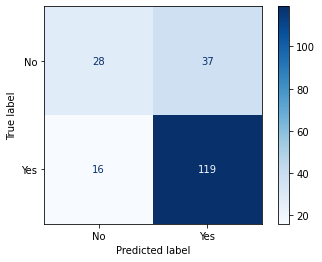

              precision    recall  f1-score   support

           0       0.64      0.43      0.51        65
           1       0.76      0.88      0.82       135

    accuracy                           0.73       200
   macro avg       0.70      0.66      0.67       200
weighted avg       0.72      0.73      0.72       200



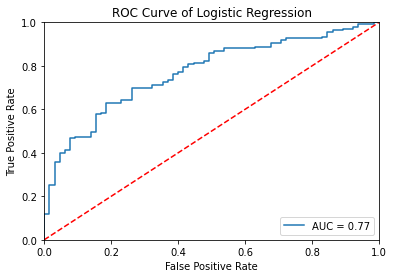

ROC AUC: 0.7690028490028491
Precision Score: 0.7628205128205128
Recall Score: 0.8814814814814815

The most important features are:
                        Variable     Coeff
0                       duration  -0.03441
1                  credit_amount    -6e-05
2               installment_rate  -0.19046
3                residence_since   0.15894
4                            age   0.02894
5               existing_credits  -0.22395
6             status_Account_A11  -0.63132
7             status_Account_A12   -0.3979
8             status_Account_A13   0.10789
9             status_Account_A14   1.09935
10            credit_history_A30  -0.18489
11            credit_history_A31   -0.2217
12            credit_history_A32   0.08395
13            credit_history_A33   0.02714
14            credit_history_A34   0.47352
15                   purpose_A40   -0.5373
16                   purpose_A41   0.41515
17                  purpose_A410  -0.00579
18                   purpose_A42  -0.00676
19       

In [24]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[::,1]
list5 = ["Logistic Regression", cross_val_score(lr, X_test, y_test, scoring="accuracy", cv = 5).mean(), cross_val_score(lr, X_test, y_test, scoring="f1", cv = 5).mean(), cross_val_score(lr, X_test, y_test, scoring="precision", cv = 5).mean(), cross_val_score(lr, X_test, y_test, scoring="recall", cv = 5).mean()]
print(list5)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')
#Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test, display_labels=['No', 'Yes'], cmap=plt.cm.Blues)
plt.show()
#Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
#create ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC = %0.2f" % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.legend(loc="lower right")
plt.show()
#Print ROC AUC score
print(f'ROC AUC: {auc}')
#Print Precision Score
print(f'Precision Score: {precision_score(y_test, y_pred)}')
#Print Recall Score
print(f'Recall Score: {recall_score(y_test, y_pred)}\n')
#Important features
print('The most important features are:')
importance = lr.coef_[0]
# summarize feature importance
fieldList = np.array(list(X_2_onehot)).reshape(-1,1)
coeffs = np.reshape(np.round(lr.coef_,5),(-1,1))
coeffs=np.concatenate((fieldList,coeffs),axis=1)
print(pd.DataFrame(coeffs,columns=['Variable','Coeff']))

['Decision Tree Classifier', 0.6700000000000002, 0.76455938697318, 0.7398096650599431, 0.7925925925925925]


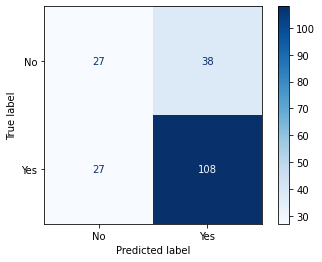

              precision    recall  f1-score   support

           0       0.50      0.42      0.45        65
           1       0.74      0.80      0.77       135

    accuracy                           0.68       200
   macro avg       0.62      0.61      0.61       200
weighted avg       0.66      0.68      0.67       200



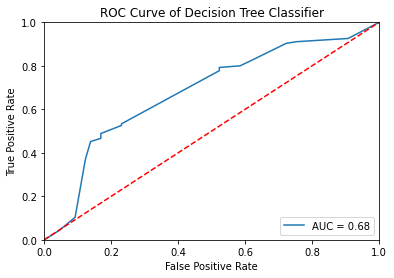

ROC AUC: 0.68005698005698
Precision Score: 0.7397260273972602
Recall Score: 0.8

The most important features are:
status_Account_A14 0.23405926759085952
duration 0.1635857210281914
age 0.11621322850064547
credit_amount 0.08494494630391045
savings_account_A65 0.055802883879013304
purpose_A40 0.03784633721106862
purpose_A43 0.03573415691830342
property_A124 0.031029325715978485
job_A174 0.02996250388459179
other_installment_plans_A143 0.023699598964712694
employment_since_A71 0.02281148315114486
other_installment_plans_A141 0.02066131121937954
savings_account_A61 0.020022194687313453
savings_account_A64 0.019301782054630786
installment_rate 0.01922130689982091
status_Account_A13 0.017058492019093256
employment_since_A72 0.01597429888207723
credit_history_A32 0.014949905366527369
personal_status_sex_A92 0.010987119821097591
residence_since 0.008008877874925375


In [25]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, max_depth=6)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[::,1]
list6 = ["Decision Tree Classifier", cross_val_score(dt, X_test, y_test, scoring="accuracy", cv = 5).mean(), cross_val_score(dt, X_test, y_test, scoring="f1", cv = 5).mean(), cross_val_score(dt, X_test, y_test, scoring="precision", cv = 5).mean(), cross_val_score(dt, X_test, y_test, scoring="recall", cv = 5).mean()]
print(list6)
#Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test, display_labels=['No', 'Yes'], cmap=plt.cm.Blues)
plt.show()
#Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
#create ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC = %0.2f" % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()
#Print ROC AUC score
print(f'ROC AUC: {auc}')
#Print Precision Score
print(f'Precision Score: {precision_score(y_test, y_pred)}')
#Print Recall Score
print(f'Recall Score: {recall_score(y_test, y_pred)}\n')
#Important features
print('The most important features are:')
for importance, name in sorted(zip(dt.feature_importances_, X_train.columns),reverse=True)[:20]:
    print (name, importance)

In [26]:
#Tabulate the results
from tabulate import tabulate
list_metrics = ["Models","Accuracy", "F1 Score", "Precision", "Recall"]
list_values = [list4, list5, list6]
table2 = tabulate(list_values, headers=list_metrics, tablefmt="fancy_grid")
print(table2)

╒══════════════════════════╤════════════╤════════════╤═════════════╤══════════╕
│ Models                   │   Accuracy │   F1 Score │   Precision │   Recall │
╞══════════════════════════╪════════════╪════════════╪═════════════╪══════════╡
│ Random Forest Classifier │       0.74 │   0.819758 │    0.773972 │ 0.874074 │
├──────────────────────────┼────────────┼────────────┼─────────────┼──────────┤
│ Logistic Regression      │       0.75 │   0.824753 │    0.78213  │ 0.874074 │
├──────────────────────────┼────────────┼────────────┼─────────────┼──────────┤
│ Decision Tree Classifier │       0.67 │   0.764559 │    0.73981  │ 0.792593 │
╘══════════════════════════╧════════════╧════════════╧═════════════╧══════════╛


Hyperparameter optimization for the above Models for Approach #2

In [27]:
#Hyperparameter tuning for Random Forest Classifier
from sklearn.model_selection import GridSearchCV
parameters = { "n_estimators": [20, 30, 50, 70, 100], "criterion": ["gini", "entropy"], "max_depth": [10, 20, 30, 40, 50], "random_state": [10, 20, 30, 40, 50]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100, 'random_state': 40}
0.8503015527931878


In [28]:
#Hyperparameter Tuning for logistic regression
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200, 300, 400, 500], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(lr, parameters, cv=5, scoring='f1', return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.8401747640788452


In [29]:
#Hyperparameter Tuning for decision tree
from sklearn.model_selection import GridSearchCV
parameters = { "max_features": ["auto", "sqrt", "log2"], "min_samples_leaf": [3, 4, 5, 7, 10], "min_samples_split": [8, 10, 12, 15], "criterion": ["gini", "entropy"], "max_depth": [10, 20, 30, 40, 50], "random_state": [10, 20, 30, 40, 50]}
grid_search = GridSearchCV(dt, parameters, cv=5, scoring='f1', return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 8, 'random_state': 40}
0.816946811272208


In [30]:
#Concatenate two tables
print('Results with label encoding: \n' + table)
print('Results with one-hot encoding: \n' + table2)

Results with label encoding: 
╒══════════════════════════╤════════════╤════════════╤═════════════╤══════════╕
│ Models                   │   Accuracy │   F1 Score │   Precision │   Recall │
╞══════════════════════════╪════════════╪════════════╪═════════════╪══════════╡
│ Random Forest Classifier │      0.735 │   0.820882 │    0.757909 │ 0.896296 │
├──────────────────────────┼────────────┼────────────┼─────────────┼──────────┤
│ Logistic Regression      │      0.72  │   0.794518 │    0.784774 │ 0.807407 │
├──────────────────────────┼────────────┼────────────┼─────────────┼──────────┤
│ Decision Tree Classifier │      0.72  │   0.795501 │    0.78966  │ 0.807407 │
╘══════════════════════════╧════════════╧════════════╧═════════════╧══════════╛
Results with one-hot encoding: 
╒══════════════════════════╤════════════╤════════════╤═════════════╤══════════╕
│ Models                   │   Accuracy │   F1 Score │   Precision │   Recall │
╞══════════════════════════╪════════════╪════════════╪════